In [13]:
from syntactic_similarity import syntactic_similarity_driver
from structural_similarity import structural_similarity_driver

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

# generating the scores csv

In [33]:


def generate_scores_csv(df,path):
    firstIndex = path.find("n_")
    finalIndex = path.find("_",firstIndex+2)
    n = int(path[firstIndex+2:finalIndex])

    cols = [
        'task_id', 'prompt', 'sequence_similarity','edit_distance_score',
        'jaccard_similarity','cosine_similarity_score','sorensen_dice_coefficient',
        'hamming_distance_score', 'UnifiedDiff','TreeDiff'
    ] + [f'pass_rate_{i}' for i in range(n+1)]


    final = pd.DataFrame(columns = cols)

    #iterating over the rows of the dataframe
    for index, row in df.iterrows():
        #getting the reference and the generated text
        generated_codes = list(row[[f'code_{i}' for i in range(n+1)]])
            
        #computing the structural similarity
        _, structural_similarity_scores_dict,_ = structural_similarity_driver(generated_codes)
        
        #computing the syntactic similarity
        _, syntactic_similarity_scores_dict,_ = syntactic_similarity_driver(generated_codes)
        
        #dict to store the data
        dict = {'task_id': row['task_id'], 'prompt': row['prompt']}

        for i in range(n+1):
            dict['pass_rate_'+str(i)] = row['pass_rate_'+str(i)]
            
        #appending the syntactic similarity scores to the dict
        for key in syntactic_similarity_scores_dict.keys():
            dict[key] = syntactic_similarity_scores_dict[key]

        #appending the structural similarity scores to the dict
        for key in structural_similarity_scores_dict.keys():
            dict[key] = structural_similarity_scores_dict[key]

        temp = pd.DataFrame(dict, index=[0])

        #concatenating the dataframes
        final = pd.concat([final, temp], ignore_index=True)
    
    path = path.replace(".csv","_sim_score.csv")
    path = path.replace("RESULTS","RESULTS/final scores")
    final.to_csv(path, index=False)

# reading the files

In [34]:
# Get a list of all CSV files in the directory
csv_files = glob.glob('./RESULTS/*.csv')

# Loop over the files and read them into pandas DataFrames
for file in csv_files:
    df = pd.read_csv(file)
    generate_scores_csv(df,file)
    print("Scores generated for ", file)

print("Scores generated successfully")

Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-4-turbo-preview_n_5_tempr_0_temps_1_trial_1.csv
Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1.5_trial_1.csv
Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_1_temps_1_trial_1.csv
Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1_trial_1.csv
Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_3_tempr_0_temps_1_trial_1.csv


/tmp/ipykernel_30350/136405827.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_10_tempr_0_temps_1_trial_1.csv
Scores generated successfully


# visualizations

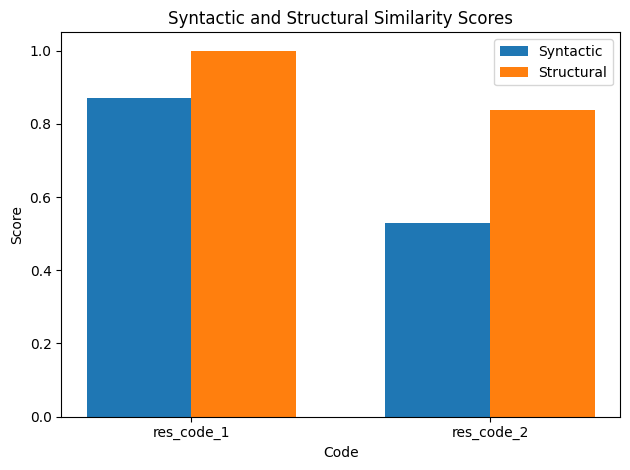

In [9]:
# Prepare data for visualization
labels = list(syntactic_similarity_scores.keys())

# Create a grouped bar chart for syntactic and structural scores
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [syntactic_similarity_scores[label]['aggregate_score'] for label in labels], width, label='Syntactic')
rects2 = ax.bar(x + width/2, [structural_similarity_scores[label]['aggregate_score'] for label in labels], width, label='Structural')

ax.set_xlabel('Code')
ax.set_ylabel('Score')
ax.set_title('Syntactic and Structural Similarity Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

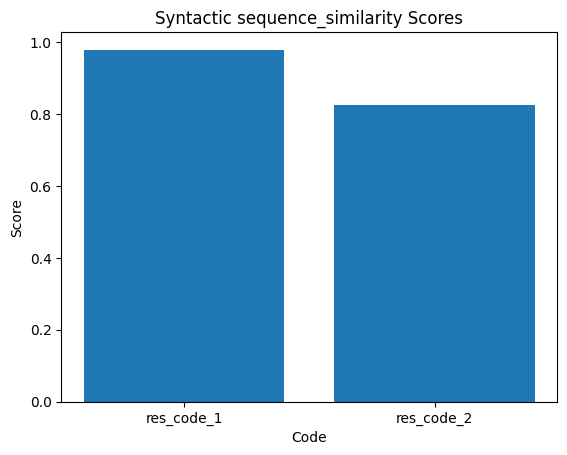

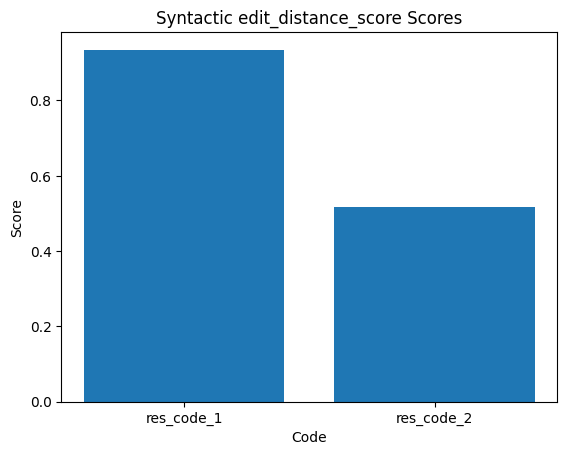

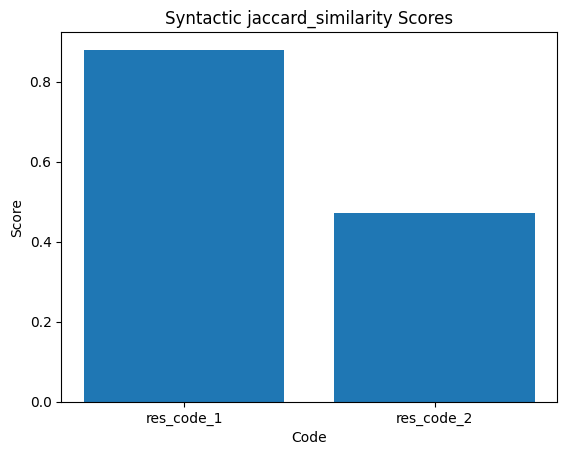

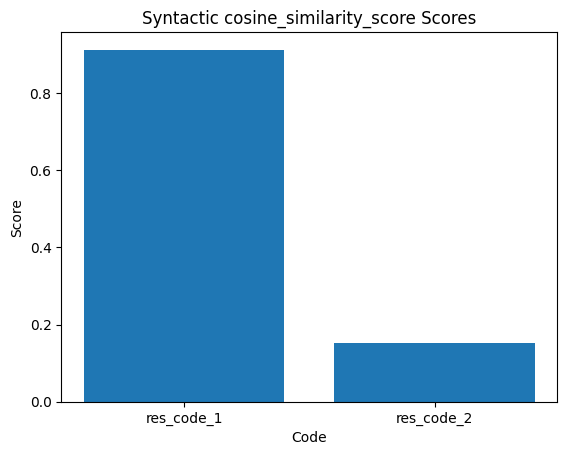

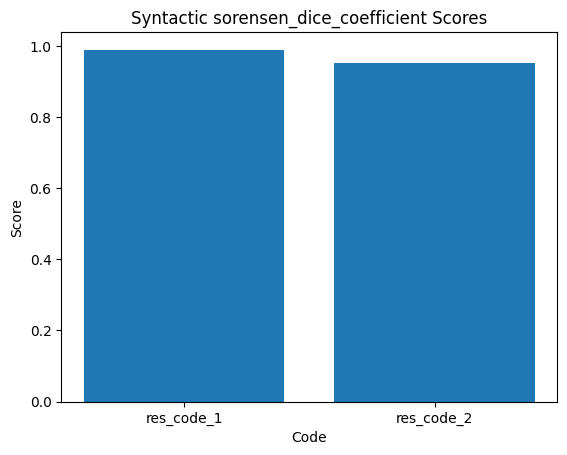

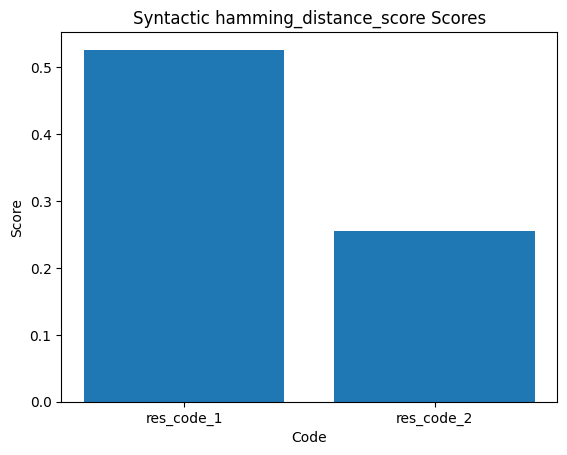

In [10]:
syntactic_metrics = list(syntactic_similarity_scores[labels[0]]['metrics'].keys())

# For each metric in syntactic metrics, create a separate bar chart
for metric in syntactic_metrics:
    plt.bar(labels, [syntactic_similarity_scores[label]['metrics'].get(metric, 0) for label in labels])
    plt.xlabel('Code')
    plt.ylabel('Score')
    plt.title(f'Syntactic {metric} Scores')
    plt.show()

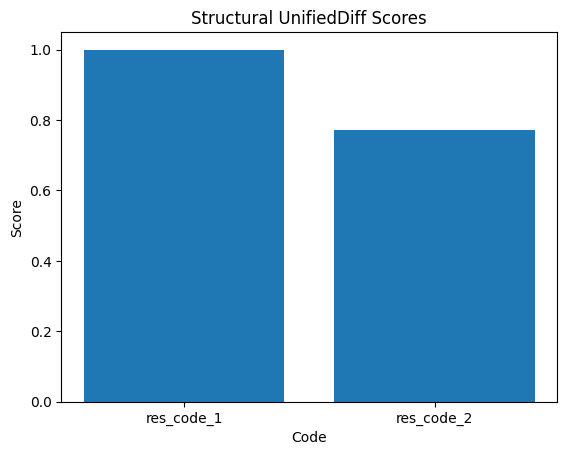

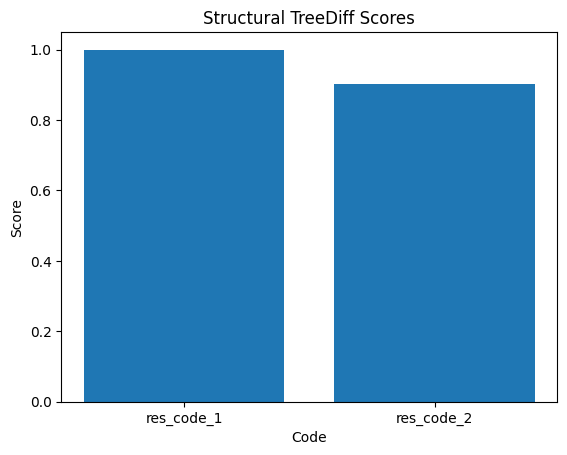

In [11]:
structural_metrics = list(structural_similarity_scores[labels[0]]['metrics'].keys())

# For each metric in structural metrics, create a separate bar chart
for metric in structural_metrics:
    plt.bar(labels, [structural_similarity_scores[label]['metrics'].get(metric, 0) for label in labels])
    plt.xlabel('Code')
    plt.ylabel('Score')
    plt.title(f'Structural {metric} Scores')
    plt.show()